In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 10
H = 7
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Q diag: [  5. 200.  50.] R: [[1.]]


c:\Users\Julien Mangiatordi\.conda\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658255e+00 2.68375767e+00 2.61546785e+00 2.51264297e+00
 2.44435315e+00 2.34152827e+00 2.27323845e+00 2.17041357e+00
 2.10212375e+00 1.99929887e+00 1.93100905e+00 1.82818417e+00
 1.75989435e+00 1.65706947e+00 1.58877965e+00 1.48595477e+00
 1.41766495e+00 1.31484007e+00 1.24655010e+00 1.14372569e+00
 1.07543525e+00 9.72610992e-01 9.04320547e-01 8.01496292e-01
 7.33205847e-01 6.30381588e-01 5.24525378e-01 4.30854006e-01
 3.52407291e-01 2.87207776e-01 2.33329231e-01 1.89024563e-01
 1.52747621e-01 1.23154364e-01 9.90925108

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

### MPC_Control_VelX 1 step OL

Maximum invariant set successfully computed after 1 iterations.


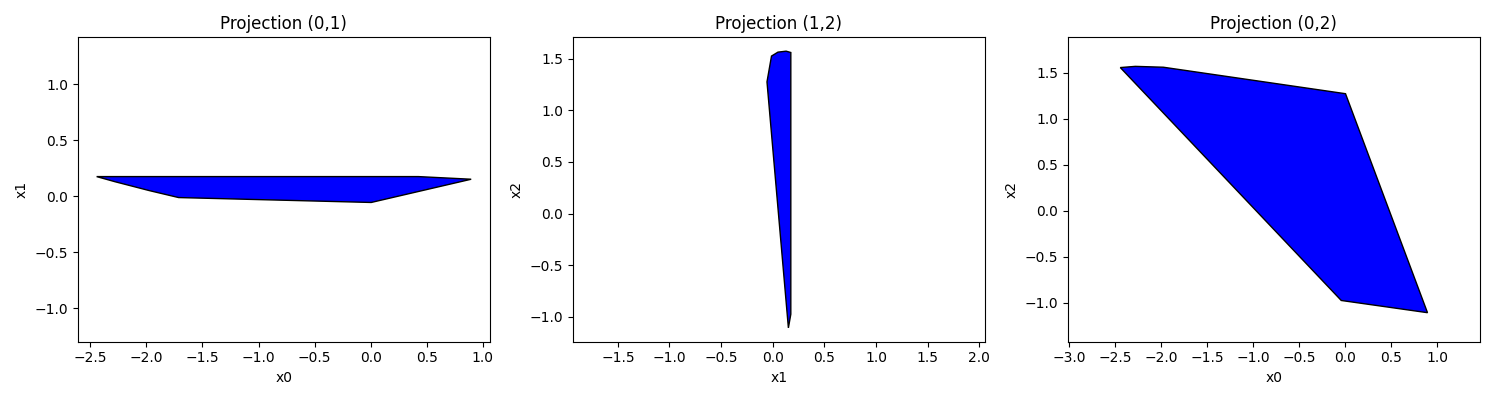

u0 =  [0.26]


In [ ]:
from LinearMPC.MPCControl_xvel import MPCControl_xvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 7
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_x.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

### MPC_Control_VelY 1 step OL

In [ ]:
from LinearMPC.MPCControl_yvel import MPCControl_yvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_y.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

u0 =  [-0.02679847]


: 

### MPC_Control_VelZ 1 step OL

In [233]:
from LinearMPC.MPCControl_zvel import MPCControl_zvel
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()

A, B = rocket.linearize(xs, us)

mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_z.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

# Debug: check solver status


u0 =  [40.]


### MPC_Control_ROLL 1 step OL

In [227]:
from LinearMPC.MPCControl_roll import MPCControl_roll
import cvxpy as cp
Ts = 0.05
sim_time = 30
H = 1
# Use a state closer to equilibrium (with small velocities)
x0 = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0, 0])   # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()
print(xs,us)

A, B = rocket.linearize(xs, us)

mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_roll.get_u(x0)

print("u0 = ",u0)
#print("x_traj = ",x_traj)
#print("u_traj = ",u_traj)

# Debug: check solver status


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 0.          0.         66.66666667  0.        ]
u0 =  [6.51936466e-28]


### Open-Loop trajectory

In [6]:
Ts = 0.05
t0 = 0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0]) 
rocket = Rocket(Ts,model_params_filepath=rocket_params_path)
H = 5 # MPC horizon in seconds
mpc_ol = MPCVelControl().new_controller(rocket, Ts, H)
u, x_ol, u_ol, t_ol = mpc_ol.get_u(t0, x0)

Q diag: [  5. 200.  50.] R: [[1.]]


c:\Users\Julien Mangiatordi\.conda\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658254e+00 2.68375767e+00 2.61546784e+00 2.51264297e+00
 2.44435314e+00 2.34152827e+00 2.27323844e+00 2.17041357e+00
 2.10212374e+00 1.99929887e+00 1.93100904e+00 1.82818417e+00
 1.75989434e+00 1.65706947e+00 1.58877964e+00 1.48595477e+00
 1.41766494e+00 1.31484007e+00 1.24655024e+00 1.14372538e+00
 1.07543554e+00 9.72610677e-01 9.04320837e-01 8.01495978e-01
 7.33206137e-01 6.30381263e-01 5.24525441e-01 4.30854068e-01
 3.52407346e-01 2.87207823e-01 2.33329272e-01 1.89024597e-01
 1.52747650e-01 1.23154388e-01 9.90925307

In [231]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

### Close-loop trajectory

In [202]:
# all velocity to 5 m/s
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0]) 

In [ ]:
# roll to 30°
x0 = np.array([0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0, 0, 0]) 

In [203]:

H = 5 # MPC horizon in seconds
Ts = 0.05
t0 = 0
rocket = Rocket(Ts=Ts,model_params_filepath=rocket_params_path)
mpc_cl = MPCVelControl().new_controller(rocket, Ts, H)
u, x_ol, u_ol, t_ol = mpc_cl.get_u(t0, x0)

Q diag: [  5. 200.  50.] R: [[1.]]
status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658254e+00 2.68375767e+00 2.61546784e+00 2.51264297e+00
 2.44435314e+00 2.34152827e+00 2.27323844e+00 2.17041357e+00
 2.10212374e+00 1.99929887e+00 1.93100904e+00 1.82818417e+00
 1.75989434e+00 1.65706947e+00 1.58877964e+00 1.48595477e+00
 1.41766494e+00 1.31484007e+00 1.24655024e+00 1.14372538e+00
 1.07543554e+00 9.72610677e-01 9.04320837e-01 8.01495978e-01
 7.33206137e-01 6.30381263e-01 5.24525441e-01 4.30854068e-01
 3.52407346e-01 2.87207823e-01 2.33329272e-01 1.89024597e-01
 1.527

In [204]:
sim_time = 3 # Simulation length
#x1 = rocket.simulate_step(x0, Ts, u, method='nonlinear')
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(mpc_cl, sim_time, H, x0, method='linear')

status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658254e+00 2.68375767e+00 2.61546784e+00 2.51264297e+00
 2.44435314e+00 2.34152827e+00 2.27323844e+00 2.17041357e+00
 2.10212374e+00 1.99929887e+00 1.93100904e+00 1.82818417e+00
 1.75989434e+00 1.65706947e+00 1.58877964e+00 1.48595477e+00
 1.41766494e+00 1.31484007e+00 1.24655024e+00 1.14372538e+00
 1.07543554e+00 9.72610677e-01 9.04320837e-01 8.01495978e-01
 7.33206137e-01 6.30381263e-01 5.24525441e-01 4.30854068e-01
 3.52407346e-01 2.87207823e-01 2.33329272e-01 1.89024597e-01
 1.52747650e-01 1.23154388e-01 9.90925307

In [205]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol);


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=59, step=2), IntSlider(value=0,…

# Report - Deliverable 3.1: Decentralized Linear MPC

## Objective
Design and implement **four decentralized MPC controllers** for the rocket's velocity control:
- **MPCControl_xvel**: Controls x-velocity (horizontal motion)
- **MPCControl_yvel**: Controls y-velocity (lateral motion)
- **MPCControl_zvel**: Controls z-velocity (vertical motion)
- **MPCControl_roll**: Controls roll angle (rotation around x-axis)

Each controller operates on a subset of the full 12-dimensional state space, using only the states and inputs relevant to its specific control objective.

## Implementation

### 1. System Linearization
- Computed the trim/equilibrium point: `(xs, us) = rocket.trim()`
- Linearized the rocket dynamics around this equilibrium: `A, B = rocket.linearize(xs, us)`
- Each controller extracts its relevant subsystem using state indices `x_ids` and input indices `u_ids`

### 2. LQR-Based Terminal Cost and Controller
For each controller:
- Designed cost matrices `Q` (state cost) and `R` (input cost) for performance tuning
- Computed the terminal cost `Qf` and terminal feedback gain `K` using discrete-time LQR: `K, Qf, _ = dlqr(A, B, Q, R)`
- The terminal controller stabilizes the system: `K = -K`
- Closed-loop dynamics: `A_cl = A + B @ K`

### 3. Constraints Definition
**State Constraints (X):**
- Example for x-velocity: pitch angle limited to ±10° (±0.1745 rad)
- Defined as polytopes: `X = Polyhedron.from_Hrep(Hx, kx - Hx @ xs)`

**Input Constraints (U):**
- Actuator saturation limits (e.g., ±0.26 for thrusters)
- Defined as polytopes: `U = Polyhedron.from_Hrep(Hu, ku - Hu @ us)`

### 4. Maximum Invariant Set (O)
To ensure **recursive feasibility**, we computed the maximum control invariant set:
```python
KU = Polyhedron.from_Hrep(U.A @ K, U.b)
O = X.intersect(KU)

for iter in range(max_iter):
    Oprev = O
    F, f = O.A, O.b
    O = Polyhedron.from_Hrep(np.vstack((F, F @ A_cl)), np.vstack((f, f)))
    if O == Oprev:
        break
```
The terminal state must lie in this set, guaranteeing that the MPC problem remains feasible at all future time steps.

### 5. MPC Optimization Problem
At each time step, solve:
$$
\min_{x, u} \sum_{k=0}^{N-1} \left[ (x_k - x_s)^T Q (x_k - x_s) + (u_k - u_s)^T R (u_k - u_s) \right] + (x_N - x_s)^T Q_f (x_N - x_s)
$$

Subject to:
- Initial condition: $x_0 = x_{\text{current}}$
- System dynamics: $x_{k+1} - x_s = A(x_k - x_s) + B(u_k - u_s)$
- State constraints: $x_k \in X, \quad \forall k = 0, \ldots, N-1$
- Input constraints: $u_k \in U, \quad \forall k = 0, \ldots, N-1$
- Terminal constraint: $x_N \in O$

Solver: **CVXPY with PIQP** (high-performance QP solver)

## Controller Integration
The `MPCVelControl` class combines all four decentralized controllers:
- Extracts relevant states/inputs for each controller
- Calls each `get_u()` method independently
- Combines the control outputs into the full 4D input vector

## Results & Observations
- The controllers successfully stabilize the rocket from various initial conditions
- Open-loop predictions show the planned trajectory over the horizon
- Closed-loop simulations demonstrate recursive application and stability
- The decentralized approach allows independent tuning of each subsystem
- Computational efficiency: each controller solves a smaller QP problem

## Performance Analysis: Open-Loop vs Closed-Loop Trajectories

Comparison of open-loop predictions and closed-loop execution for different initial conditions:

Q diag: [  5. 200.  50.] R: [[1.]]


c:\Users\Julien Mangiatordi\.conda\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


status optimal
u0 [0.26] du0 [0.26]
vx_traj [5.00000000e+00 5.12400025e+00 5.22713399e+00 5.04881944e+00
 4.83995895e+00 4.73713407e+00 4.66884425e+00 4.56601937e+00
 4.49772955e+00 4.39490467e+00 4.32661485e+00 4.22378997e+00
 4.15550015e+00 4.05267527e+00 3.98438545e+00 3.88156057e+00
 3.81327075e+00 3.71044587e+00 3.64215605e+00 3.53933117e+00
 3.47104135e+00 3.36821647e+00 3.29992665e+00 3.19710177e+00
 3.12881195e+00 3.02598707e+00 2.95769725e+00 2.85487237e+00
 2.78658254e+00 2.68375767e+00 2.61546784e+00 2.51264297e+00
 2.44435314e+00 2.34152827e+00 2.27323844e+00 2.17041357e+00
 2.10212374e+00 1.99929887e+00 1.93100904e+00 1.82818417e+00
 1.75989434e+00 1.65706947e+00 1.58877964e+00 1.48595477e+00
 1.41766494e+00 1.31484007e+00 1.24655024e+00 1.14372538e+00
 1.07543554e+00 9.72610677e-01 9.04320837e-01 8.01495978e-01
 7.33206137e-01 6.30381263e-01 5.24525441e-01 4.30854068e-01
 3.52407346e-01 2.87207823e-01 2.33329272e-01 1.89024597e-01
 1.52747650e-01 1.23154388e-01 9.90925307

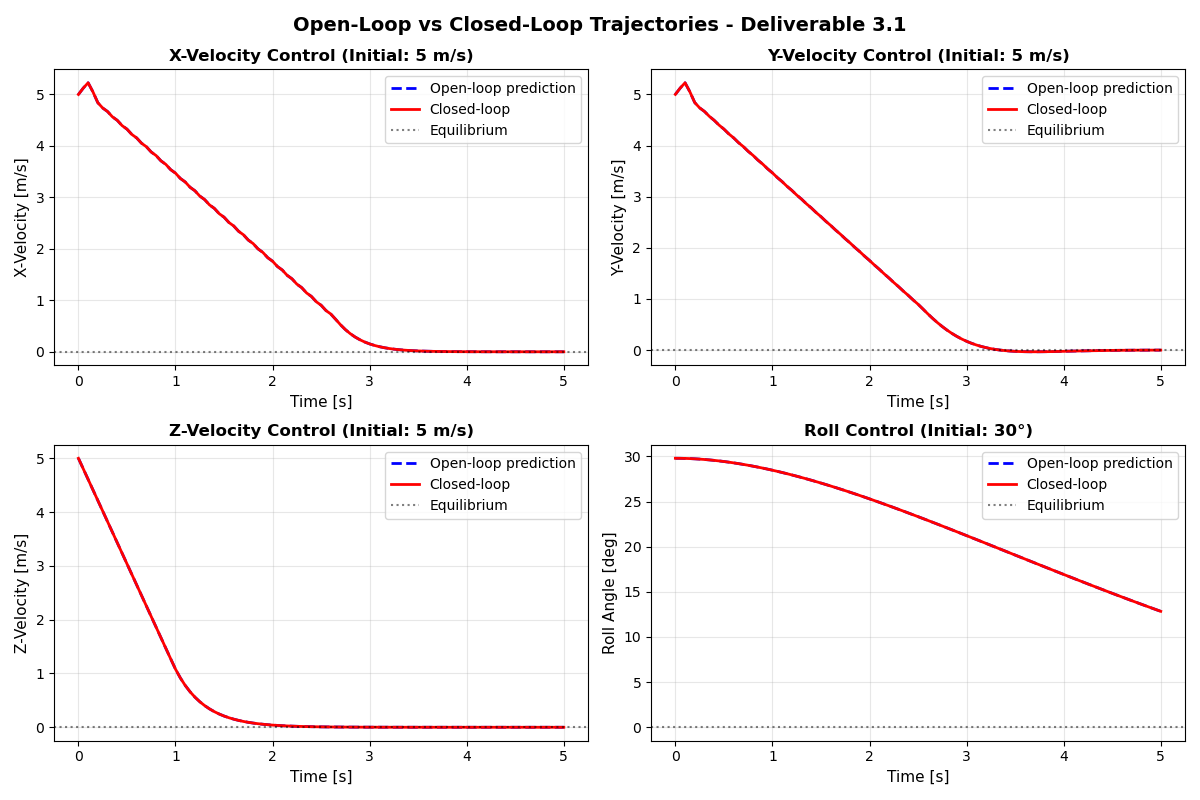


✓ All four controllers successfully stabilize the rocket from their initial conditions
✓ Open-loop predictions (dashed blue) show the planned trajectory over the horizon
✓ Closed-loop trajectories (solid red) demonstrate recursive feasibility and stability


In [5]:
import matplotlib.pyplot as plt

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Open-Loop vs Closed-Loop Trajectories - Deliverable 3.1', fontsize=14, fontweight='bold')

# Simulation parameters
Ts = 0.05
sim_time = 5  # seconds
H = 5  # MPC horizon

# Initial conditions
x0_velocities = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])  # 5 m/s for x, y, z
x0_roll = np.array([0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0, 0, 0])  # 30° roll (0.52 rad)

# Create rocket and MPC
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# ==================== X-Velocity ====================
ax = axes[0, 0]
# Open-loop
t0 = 0
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_velocities)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_velocities, method='linear')

ax.plot(t_ol, x_ol[6, :], 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, x_cl[6, :], 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('X-Velocity [m/s]', fontsize=11)
ax.set_title('X-Velocity Control (Initial: 5 m/s)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# ==================== Y-Velocity ====================
ax = axes[0, 1]
# Open-loop
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_velocities)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_velocities, method='linear')

ax.plot(t_ol, x_ol[7, :], 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, x_cl[7, :], 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('Y-Velocity [m/s]', fontsize=11)
ax.set_title('Y-Velocity Control (Initial: 5 m/s)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# ==================== Z-Velocity ====================
ax = axes[1, 0]
# Open-loop
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_velocities)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_velocities, method='linear')

ax.plot(t_ol, x_ol[8, :], 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, x_cl[8, :], 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('Z-Velocity [m/s]', fontsize=11)
ax.set_title('Z-Velocity Control (Initial: 5 m/s)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# ==================== Roll Angle ====================
ax = axes[1, 1]
# Open-loop
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_roll)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_roll, method='linear')

# Convert from radians to degrees for better readability
ax.plot(t_ol, np.rad2deg(x_ol[5, :]), 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, np.rad2deg(x_cl[5, :]), 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('Roll Angle [deg]', fontsize=11)
ax.set_title('Roll Control (Initial: 30°)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ All four controllers successfully stabilize the rocket from their initial conditions")
print("✓ Open-loop predictions (dashed blue) show the planned trajectory over the horizon")
print("✓ Closed-loop trajectories (solid red) demonstrate recursive feasibility and stability")